In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv', encoding='unicode_escape')

In [4]:
df.columns = df.columns.str.strip()
df['Gender'] = df['Gender'].str.strip().str.capitalize()

In [5]:
df.shape

(30691, 11)

In [6]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,AAP,SAA_1,SAA_2,Total_Protiens,ALB_Albumin,A/G_RATIO,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [7]:
df.tail()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               30689 non-null  float64
 1   Gender            29789 non-null  object 
 2   Total_Bilirubin   30043 non-null  float64
 3   Direct_Bilirubin  30130 non-null  float64
 4   AAP               29895 non-null  float64
 5   SAA_1             30153 non-null  float64
 6   SAA_2             30229 non-null  float64
 7   Total_Protiens    30228 non-null  float64
 8   ALB_Albumin       30197 non-null  float64
 9   A/G_RATIO         30132 non-null  float64
 10  Result            30691 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 2.6+ MB


In [8]:
df.isnull().sum()

df.nunique()

Age                  77
Gender                2
Total_Bilirubin     113
Direct_Bilirubin     80
AAP                 263
SAA_1               152
SAA_2               177
Total_Protiens       58
ALB_Albumin          40
A/G_RATIO            69
Result                2
dtype: int64

In [9]:
df.select_dtypes(include='number').corr(method='pearson')


,Age,Total_Bilirubin,Direct_Bilirubin,AAP,SAA_1,SAA_2,Total_Protiens,ALB_Albumin,A/G_RATIO,Result
Age,1.000000,-0.001600,-0.001521,-0.000761,0.000659,0.006104,-0.007951,-0.015164,-0.018056,-0.004759
Total_Bilirubin,-0.001600,1.000000,0.886987,0.197183,0.207893,0.240273,0.001185,-0.222522,-0.197978,-0.225061
Direct_Bilirubin,-0.001521,0.886987,1.000000,0.220954,0.222759,0.256200,0.006474,-0.229106,-0.189414,-0.249538
AAP,-0.000761,0.197183,0.220954,1.000000,0.124099,0.160690,-0.022321,-0.161060,-0.228583,-0.183356
SAA_1,0.000659,0.207893,0.222759,0.124099,1.000000,0.783411,-0.041400,-0.026346,-0.002433,-0.165914
SAA_2,0.006104,0.240273,0.256200,0.160690,0.783411,1.000000,-0.024501,-0.083383,-0.066912,-0.158660
Total_Protiens,-0.007951,0.001185,0.006474,-0.022321,-0.041400,-0.024501,1.000000,0.775607,0.226314,0.030370
ALB_Albumin,-0.015164,-0.222522,-0.229106,-0.161060,-0.026346,-0.083383,0.775607,1.000000,0.682759,0.160346
A/G_RATIO,-0.018056,-0.197978,-0.189414,-0.228583,-0.002433,-0.066912,0.226314,0.682759,1.000000,0.158350
Result,-0.004759,-0.225061,-0.249538,-0.183356,-0.165914,-0.158660,0.030370,0.160346,0.158350,1.000000


In [10]:
df.duplicated().sum()

11323

In [11]:
df['AAP']

num_features = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'AAP', 'SAA_1', 'SAA_2', 'Total_Protiens', 'ALB_Albumin',
                'A/G_RATIO']
cat_features = ['Gender']

In [12]:
df_cleaned = df.dropna(subset=num_features + cat_features + ['Result'])
x = df_cleaned.drop(columns=['Result'])
y = df_cleaned['Result']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.09, random_state=36, stratify=y)


In [14]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder()

num_pipeline = Pipeline(steps=[('imputer1', imputer_num)])
cat_pipeline = Pipeline(steps=[('imputer2', imputer_cat), ('encoder', encoder)])

transformer = ColumnTransformer(transformers=[
    ('pipe1', num_pipeline, num_features),
    ('pipe2', cat_pipeline, cat_features)
])


In [15]:
transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [16]:
df.head()

df.tail()

df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,AAP,SAA_1,SAA_2,Total_Protiens,ALB_Albumin,A/G_RATIO,Result
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


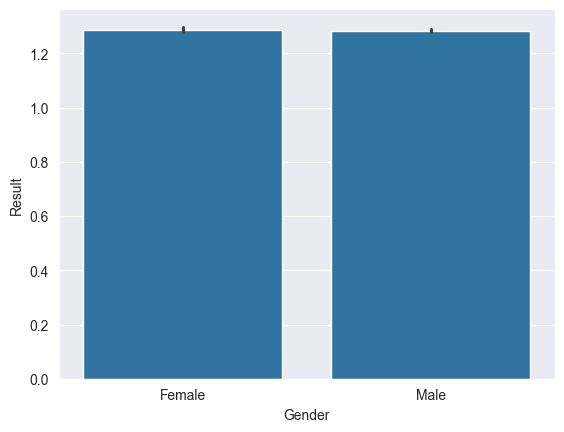

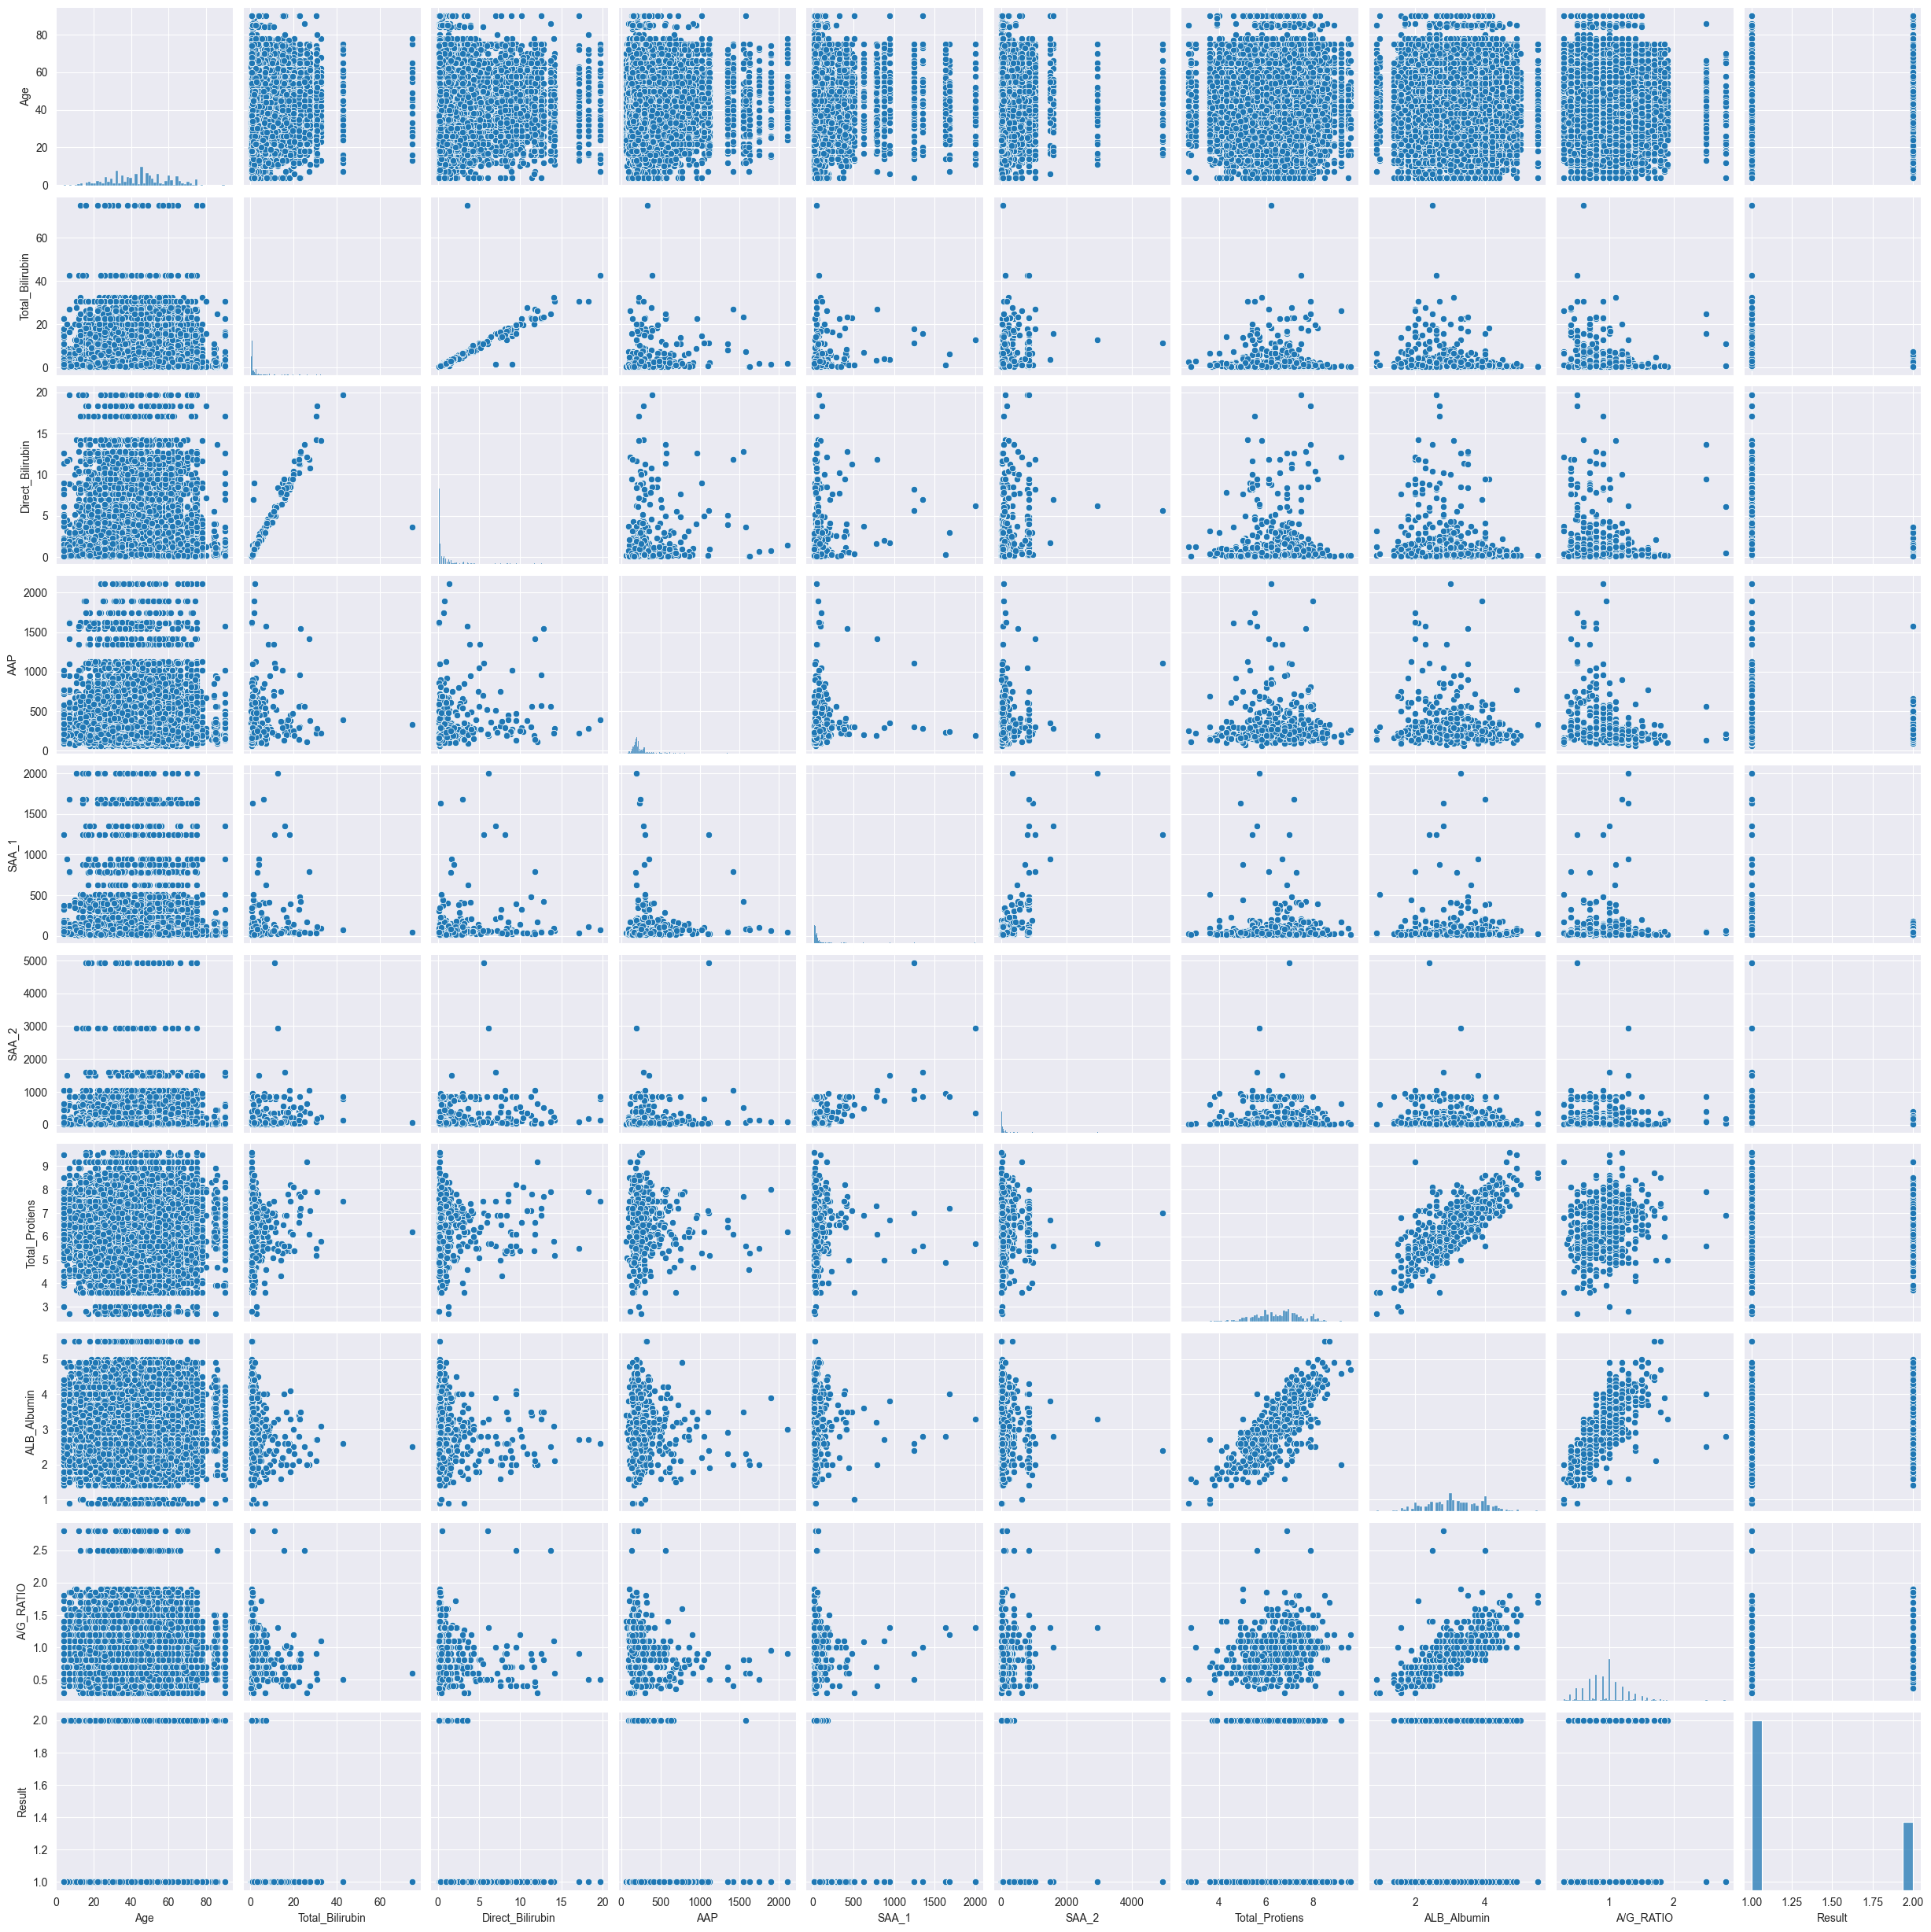

In [17]:
df.groupby('Gender').Result.value_counts()

sns.barplot(x='Gender', y='Result', data=df)

df.groupby('Result').Age.mean()

sns.pairplot(df)

In [18]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [19]:
models = [
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    LogisticRegression(max_iter=100000),
    BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=9000, max_samples=0.9999, oob_score=True,
                      random_state=True)
]

for model in models:
    model.fit(X_train, y_train)
    print(f"Accuracy score of {model} is: {model.score(X_test, y_test) * 100:.2f}%")
    print("*************************************************************")

models2 = [
    GradientBoostingClassifier(n_estimators=3000, learning_rate=0.01),
    AdaBoostClassifier(n_estimators=3000, learning_rate=0.01)
]

for model in models2:
    model.fit(X_train, y_train)
    print(f"Accuracy score of {model} is: {model.score(X_test, y_test) * 100:.2f}%")
    print("*************************************************************")


Accuracy score of RandomForestClassifier() is: 99.96%
*************************************************************
Accuracy score of DecisionTreeClassifier() is: 99.96%
*************************************************************
Accuracy score of LogisticRegression(max_iter=100000) is: 70.67%
*************************************************************
Accuracy score of BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.9999,
                  n_estimators=9000, oob_score=True, random_state=True) is: 99.96%
*************************************************************
Accuracy score of GradientBoostingClassifier(learning_rate=0.01, n_estimators=3000) is: 98.90%
*************************************************************
Accuracy score of AdaBoostClassifier(learning_rate=0.01, n_estimators=3000) is: 76.81%
*************************************************************


In [20]:

model = RandomForestClassifier(n_estimators=4900)
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(classification_report(y_test, y_pred))

Accuracy Score: 99.96%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1754
           2       1.00      1.00      1.00       691

    accuracy                           1.00      2445
   macro avg       1.00      1.00      1.00      2445
weighted avg       1.00      1.00      1.00      2445



In [21]:
import pickle
import bz2
#
# with bz2.BZ2File("Delete/Liver_Disease", 'wb') as f:
#     pickle.dump(model, f)
with bz2.BZ2File("liver_disease_model.pbz2", 'wb') as f:
    pickle.dump(model, f)

In [22]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import brier_score_loss, log_loss, roc_auc_score
from sklearn.calibration import calibration_curve

calibrated_model = CalibratedClassifierCV(model, method='isotonic', cv=5)
calibrated_model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]
y_prob_calibrated = calibrated_model.predict_proba(X_test)[:, 1]


def compute_binary_ece(y_true, y_prob, n_bins=10):
    bin_edges = np.linspace(0, 1, n_bins + 1)
    ece = 0.0
    probs = y_prob  # fixed here
    preds = (probs >= 0.5).astype(int)

    for i in range(n_bins):
        bin_lower = bin_edges[i]
        bin_upper = bin_edges[i + 1]
        mask = (probs > bin_lower) & (probs <= bin_upper)
        bin_size = np.sum(mask)
        if bin_size > 0:
            bin_accuracy = np.mean(y_true[mask] == preds[mask])
            bin_confidence = np.mean(probs[mask])
            ece += (bin_size / len(y_true)) * abs(bin_accuracy - bin_confidence)
    return ece


In [23]:
initial_ece = compute_binary_ece(y_test, y_prob)
post_scaling_ece = compute_binary_ece(y_test, y_prob_calibrated)
print(f"Initial ECE: {initial_ece:.4f}")
print(f"Post-scaling ECE: {post_scaling_ece:.4f}")
print(f"Improvement: {((initial_ece - post_scaling_ece) / initial_ece) * 100:.2f}%")

prob_true, prob_pred = calibration_curve(y_test, y_prob_calibrated, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Calibrated')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True)
plt.show()

Initial ECE: 0.2825
Post-scaling ECE: 0.2823
Improvement: 0.08%


ValueError: y_true takes value in {1, 2} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

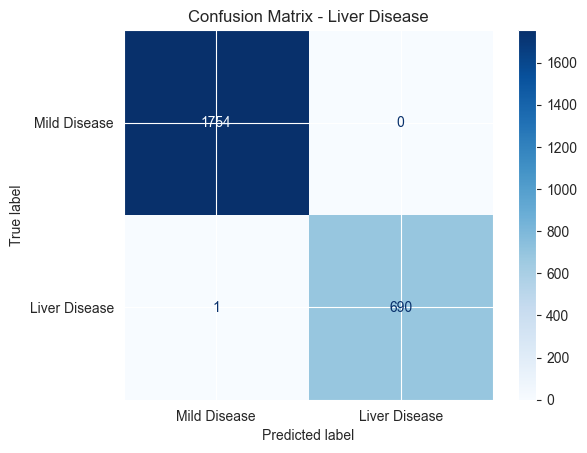

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

display_labels = {0: "No Disease", 1: "Mild Disease", 2: "Liver Disease"}
label_names = [display_labels.get(label, f"Class {label}") for label in np.unique(y_test)]

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=label_names,
    labels=np.unique(y_test),
    cmap=plt.cm.Blues,
    colorbar=True
)
plt.title("Confusion Matrix - Liver Disease")
plt.show()

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('train.csv', encoding='unicode_escape')

# Data Preprocessing
df.columns = df.columns.str.strip()
df['Gender'] = df['Gender'].str.strip().str.capitalize()

num_features = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'AAP', 'SAA_1', 'SAA_2', 'Total_Protiens', 'ALB_Albumin',
                'A/G_RATIO']
cat_features = ['Gender']

df_cleaned = df.dropna(subset=num_features + cat_features + ['Result'])
x = df_cleaned.drop(columns=['Result'])
y = df_cleaned['Result']

# Splitting the data is crucial *before* any transformations
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.09, random_state=36, stratify=y)


# Preprocessing pipeline (applied only to X)
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder()

num_pipeline = Pipeline(steps=[('imputer1', imputer_num), ('scaler', StandardScaler())])  # Added StandardScaler
cat_pipeline = Pipeline(steps=[('imputer2', imputer_cat), ('encoder', encoder)])

transformer = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

# Fit and transform the training data
X_train = transformer.fit_transform(X_train)
# Transform the test data using the fitted transformer
X_test = transformer.transform(X_test)


# Models (include Logistic Regression with adjusted parameters)
models = {
    'Random Forest': RandomForestClassifier(random_state=42), # Added random_state for reproducibility
    'Decision Tree': DecisionTreeClassifier(random_state=42),  # Added random_state
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear', max_iter=1000), # Added solver and max_iter
    'Bagging Decision Tree': BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_estimators=100,  random_state=42), # Reduced n_estimators
    'Gradient Boosting': GradientBoostingClassifier(random_state=42), # Added random_state
    'AdaBoost': AdaBoostClassifier(random_state=42) # Added random_state
}

results = {}
baseline_model_name = 'Logistic Regression' # Define the baseline

# Cross-validation and model evaluation
for model_name, model in models.items():
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores_acc = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    cv_scores_prec = cross_val_score(model, X_train, y_train, cv=kf, scoring='precision_weighted')
    cv_scores_rec = cross_val_score(model, X_train, y_train, cv=kf, scoring='recall_weighted')
    cv_scores_f1 = cross_val_score(model, X_train, y_train, cv=kf, scoring='f1_weighted')

    results[model_name] = {
        'Accuracy': {'mean': np.mean(cv_scores_acc), 'std': np.std(cv_scores_acc), 'values': cv_scores_acc},
        'Precision': {'mean': np.mean(cv_scores_prec), 'std': np.std(cv_scores_prec), 'values': cv_scores_prec},
        'Recall': {'mean': np.mean(cv_scores_rec), 'std': np.std(cv_scores_rec), 'values': cv_scores_rec},
        'F1-score': {'mean': np.mean(cv_scores_f1), 'std': np.std(cv_scores_f1), 'values': cv_scores_f1},
    }

def calculate_p_values(results, baseline_model=baseline_model_name):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
    for model_name in results:
        if model_name != baseline_model:
            results[model_name]['p-value'] = {}
            for metric in metrics:
                try:
                    _, p_value = ttest_ind(results[baseline_model][metric]['values'], results[model_name][metric]['values'])
                    results[model_name]['p-value'][metric] = p_value
                except Exception as e:
                    print(f"Error calculating p-value for {model_name} and {metric}: {e}")
                    results[model_name]['p-value'][metric] = np.nan
        else:
            results[model_name]['p-value'] = {m: np.nan for m in metrics}
    return results

results = calculate_p_values(results, baseline_model=baseline_model_name) # added baseline

# Print the table
print("Table: Performance of Machine Learning Models")
print("-------------------------------------------------------------------------------------------------------------------")
print(f"{'ML Models':<25} {'Accuracy':<20} {'Precision':<20} {'Recall':<20} {'F1-score':<20} {'p-value'}")
print("-------------------------------------------------------------------------------------------------------------------")

for model_name, model_data in results.items():
    accuracy_str = f"{model_data['Accuracy']['mean']:.4f} ±{model_data['Accuracy']['std']:.5f}"
    precision_str = f"{model_data['Precision']['mean']:.4f} ±{model_data['Precision']['std']:.5f}"
    recall_str = f"{model_data['Recall']['mean']:.4f} ±{model_data['Recall']['std']:.5f}"
    f1_str = f"{model_data['F1-score']['mean']:.4f} ±{model_data['F1-score']['std']:.5f}"
    p_value_str = {metric: f"{model_data['p-value'][metric]:.4f}" if not np.isnan(model_data['p-value'][metric]) else "N/A" for metric in ['Accuracy', 'Precision', 'Recall', 'F1-score']}

    print(f"{model_name:<25} {accuracy_str:<20} {precision_str:<20} {recall_str:<20} {f1_str:<20} "
          f"{p_value_str['Accuracy']:<10}, {p_value_str['Precision']:<10}, {p_value_str['Recall']:<10}, {p_value_str['F1-score']:<10}")
print("-------------------------------------------------------------------------------------------------------------------")


Table: Performance of Machine Learning Models
-------------------------------------------------------------------------------------------------------------------
ML Models                 Accuracy             Precision            Recall               F1-score             p-value
-------------------------------------------------------------------------------------------------------------------
Random Forest             0.9998 ±0.00015      0.9998 ±0.00015      0.9998 ±0.00015      0.9998 ±0.00015      0.0000    , 0.0000    , 0.0000    , 0.0000    
Decision Tree             0.9996 ±0.00026      0.9996 ±0.00026      0.9996 ±0.00026      0.9996 ±0.00026      0.0000    , 0.0000    , 0.0000    , 0.0000    
Logistic Regression       0.7249 ±0.00523      0.6871 ±0.00601      0.7249 ±0.00523      0.6708 ±0.01068      N/A       , N/A       , N/A       , N/A       
Bagging Decision Tree     0.9996 ±0.00024      0.9996 ±0.00024      0.9996 ±0.00024      0.9996 ±0.00024      0.0000    , 0.0000    ,

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('train.csv', encoding='unicode_escape')

# Data Preprocessing
df.columns = df.columns.str.strip()
df['Gender'] = df['Gender'].str.strip().str.capitalize()

num_features = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'AAP', 'SAA_1', 'SAA_2', 'Total_Protiens', 'ALB_Albumin',
                'A/G_RATIO']
cat_features = ['Gender']

df_cleaned = df.dropna(subset=num_features + cat_features + ['Result'])
x = df_cleaned.drop(columns=['Result'])
y = df_cleaned['Result']

# Splitting the data is crucial *before* any transformations
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.09, random_state=36, stratify=y)


# Preprocessing pipeline (applied only to X)
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder()

num_pipeline = Pipeline(steps=[('imputer1', imputer_num), ('scaler', StandardScaler())])  # Added StandardScaler
cat_pipeline = Pipeline(steps=[('imputer2', imputer_cat), ('encoder', encoder)])

transformer = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

# Fit and transform the training data
X_train = transformer.fit_transform(X_train)
# Transform the test data using the fitted transformer
X_test = transformer.transform(X_test)


# Models (include Logistic Regression with adjusted parameters)
models = {
    'Random Forest': RandomForestClassifier(random_state=42), # Added random_state for reproducibility
    'Decision Tree': DecisionTreeClassifier(random_state=42),  # Added random_state
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear', max_iter=1000), # Added solver and max_iter
    'Bagging Decision Tree': BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_estimators=100,  random_state=42), # Reduced n_estimators
    'Gradient Boosting': GradientBoostingClassifier(random_state=42), # Added random_state
    'AdaBoost': AdaBoostClassifier(random_state=42) # Added random_state
}

results = {}
baseline_model_name = 'Logistic Regression' # Define the baseline

# Cross-validation and model evaluation
for model_name, model in models.items():
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores_acc = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    cv_scores_prec = cross_val_score(model, X_train, y_train, cv=kf, scoring='precision_weighted')
    cv_scores_rec = cross_val_score(model, X_train, y_train, cv=kf, scoring='recall_weighted')
    cv_scores_f1 = cross_val_score(model, X_train, y_train, cv=kf, scoring='f1_weighted')

    results[model_name] = {
        'Accuracy': {'mean': np.mean(cv_scores_acc), 'std': np.std(cv_scores_acc), 'values': cv_scores_acc},
        'Precision': {'mean': np.mean(cv_scores_prec), 'std': np.std(cv_scores_prec), 'values': cv_scores_prec},
        'Recall': {'mean': np.mean(cv_scores_rec), 'std': np.std(cv_scores_rec), 'values': cv_scores_rec},
        'F1-score': {'mean': np.mean(cv_scores_f1), 'std': np.std(cv_scores_f1), 'values': cv_scores_f1},
    }

def calculate_p_values(results, baseline_model=baseline_model_name):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
    for model_name in results:
        if model_name != baseline_model:
            results[model_name]['p-value'] = {}
            for metric in metrics:
                try:
                    _, p_value = ttest_ind(results[baseline_model][metric]['values'], results[model_name][metric]['values'])
                    results[model_name]['p-value'][metric] = p_value
                except Exception as e:
                    print(f"Error calculating p-value for {model_name} and {metric}: {e}")
                    results[model_name]['p-value'][metric] = np.nan
        else:
            results[model_name]['p-value'] = {m: np.nan for m in metrics}
    return results

results = calculate_p_values(results, baseline_model=baseline_model_name) # added baseline

# Print the table
print("Table: Performance of Machine Learning Models")
print("-------------------------------------------------------------------------------------------------------------------")
print(f"{'ML Models':<25} {'Accuracy':<20} {'Precision':<20} {'Recall':<20} {'F1-score':<20} {'p-value'}")
print("-------------------------------------------------------------------------------------------------------------------")

for model_name, model_data in results.items():
    accuracy_str = f"{model_data['Accuracy']['mean']:.4f} ±{model_data['Accuracy']['std']:.5f}"
    precision_str = f"{model_data['Precision']['mean']:.4f} ±{model_data['Precision']['std']:.5f}"
    recall_str = f"{model_data['Recall']['mean']:.4f} ±{model_data['Recall']['std']:.5f}"
    f1_str = f"{model_data['F1-score']['mean']:.4f} ±{model_data['F1-score']['std']:.5f}"
    p_value_str = {metric: f"{model_data['p-value'][metric]:.4f}" if not np.isnan(model_data['p-value'][metric]) else "N/A" for metric in ['Accuracy', 'Precision', 'Recall', 'F1-score']}

    print(f"{model_name:<25} {accuracy_str:<20} {precision_str:<20} {recall_str:<20} {f1_str:<20} "
          f"{p_value_str['Accuracy']:<10}, {p_value_str['Precision']:<10}, {p_value_str['Recall']:<10}, {p_value_str['F1-score']:<10}")
print("-------------------------------------------------------------------------------------------------------------------")



Table: Performance of Machine Learning Models
-------------------------------------------------------------------------------------------------------------------
ML Models                 Accuracy             Precision            Recall               F1-score             p-value
-------------------------------------------------------------------------------------------------------------------
Random Forest             0.9998 ±0.00015      0.9998 ±0.00015      0.9998 ±0.00015      0.9998 ±0.00015      0.0000    , 0.0000    , 0.0000    , 0.0000    
Decision Tree             0.9996 ±0.00026      0.9996 ±0.00026      0.9996 ±0.00026      0.9996 ±0.00026      0.0000    , 0.0000    , 0.0000    , 0.0000    
Logistic Regression       0.7249 ±0.00523      0.6871 ±0.00601      0.7249 ±0.00523      0.6708 ±0.01068      N/A       , N/A       , N/A       , N/A       
Bagging Decision Tree     0.9996 ±0.00024      0.9996 ±0.00024      0.9996 ±0.00024      0.9996 ±0.00024      0.0000    , 0.0000    ,